$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve

$\color{yellow}{\text{Zadanie 3}}$

```Porównanie metod całkowania```

Funkcja pomocnicza do tworzenia wykresów

In [2]:
def plot_SIR(S, I, R, t, method_name = ''):
    plt.figure(figsize=(12,8))
    plt.plot(t, S, label='S(t) - Podatni')
    plt.plot(t, I, label='I(t) - Zarażeni')
    plt.plot(t, R, label='R(t) - Ozdrowieńcy')
    plt.xlabel('Czas [dni]')
    plt.ylabel('Populacja')
    plt.title(f'Model epidemiologiczny - {method_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

Zadajemy parametry modelu oraz kroku

In [3]:
S0 = 762
I0 = 1
R0 = 0

N = S0 + I0 + R0
beta = 1
gamma = 1/7

h = 0.2 # krok czasowy
t = np.arange(0, 14 + h, h)

Iteracja jawną metodą Eulera

In [4]:
# Inicjalizacja list wynikow
S_ee = np.zeros(len(t))
I_ee = np.zeros(len(t))
R_ee = np.zeros(len(t))
S_ee[0] = S0
I_ee[0] = I0
R_ee[0] = R0

for n in range(1, len(t)):
    S_ee[n] = S_ee[n-1] - h * beta * S_ee[n-1] * I_ee[n-1] / N
    I_ee[n] = I_ee[n-1] + h * beta * S_ee[n-1] * I_ee[n-1] / N - h * gamma * I_ee[n-1]
    R_ee[n] = R_ee[n-1] + h * gamma * I_ee[n-1]

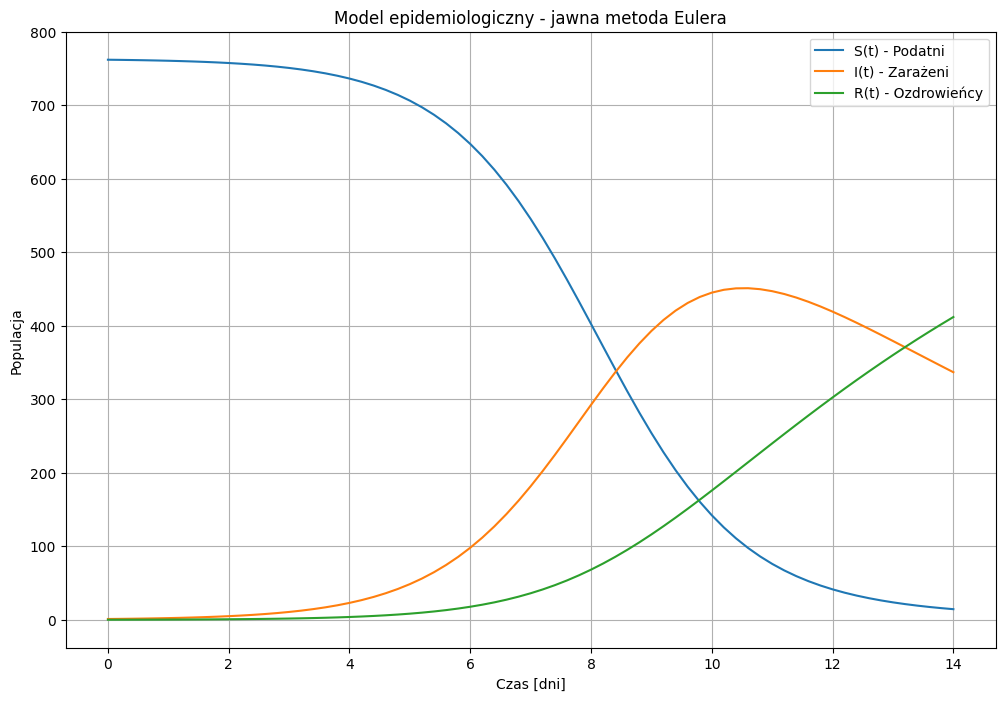

In [5]:
plot_SIR(S_ee, I_ee, R_ee, t, 'jawna metoda Eulera')

Iteracja niejawną metodą Eulera

In [6]:
def f(y):
    S, I, R = y
    dSdt = -beta / N * I * S
    dIdt = beta / N * I * S - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

# Funkcja dla niejawnej metody Eulera
def implicit_euler_step(y_k, h):
    def implicit_eq(y_next):
        return y_next - y_k - h * f(y_next)
    
    y_next = fsolve(implicit_eq, y_k)
    return y_next

# Inicjalizacja list wynikow
S_ie = np.zeros(len(t))
I_ie = np.zeros(len(t))
R_ie = np.zeros(len(t))
S_ie[0] = S0
I_ie[0] = I0
R_ie[0] = R0

# Iteracja
for n in range(1, len(t)):
    y_k = np.array([S_ie[n-1], I_ie[n-1], R_ie[n-1]])
    y_next = implicit_euler_step(y_k, h)
    S_ie[n], I_ie[n], R_ie[n] = y_next

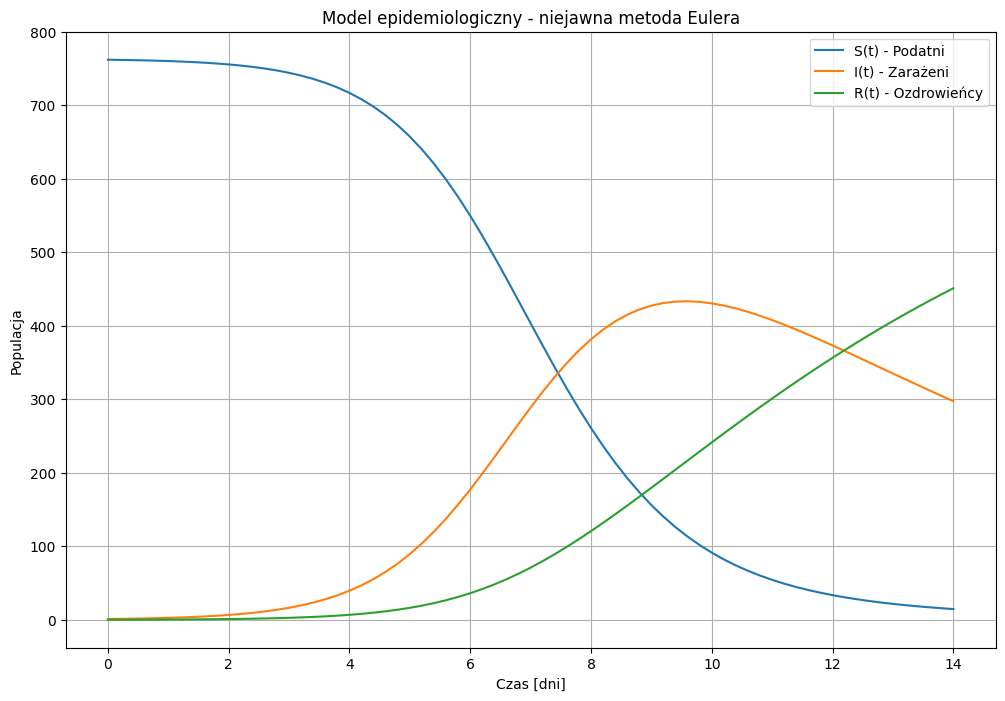

In [7]:
plot_SIR(S_ie, I_ie, R_ie, t, 'niejawna metoda Eulera')

Iteracja metodą Rungego-Kutty czwartego rzędu (RK4)

In [8]:
# Inicjalizacja list wynikow
S_RK4 = np.zeros(len(t))
I_RK4 = np.zeros(len(t))
R_RK4 = np.zeros(len(t))
S_RK4[0] = S0
I_RK4[0] = I0
R_RK4[0] = R0

for n in range(1, len(t)):
    k1_S = - (beta / N) * I_RK4[n-1] * S_RK4[n-1]
    k1_I = (beta / N) * I_RK4[n-1] * S_RK4[n-1] - gamma * I_RK4[n-1]
    k1_R = gamma * I_RK4[n-1]
    k2_S = - (beta / N) * (I_RK4[n-1] + 0.5 * h * k1_I) * (S_RK4[n-1] + 0.5 * h * k1_S)
    k2_I = (beta / N) * (I_RK4[n-1] + 0.5 * h * k1_I) * (S_RK4[n-1] + 0.5 * h * k1_S) - gamma * (I_RK4[n-1] + 0.5 * h * k1_I)
    k2_R = gamma * (I_RK4[n-1] + 0.5 * h * k1_I)
    k3_S = - (beta / N) * (I_RK4[n-1] + 0.5 * h * k2_I) * (S_RK4[n-1] + 0.5 * h * k2_S)
    k3_I = (beta / N) * (I_RK4[n-1] + 0.5 * h * k2_I) * (S_RK4[n-1] + 0.5 * h * k2_S) - gamma * (I_RK4[n-1] + 0.5 * h * k2_I)
    k3_R = gamma * (I_RK4[n-1] + 0.5 * h * k2_I)
    k4_S = - (beta / N) * (I_RK4[n-1] + h * k3_I) * (S_RK4[n-1] + h * k3_S)
    k4_I = (beta / N) * (I_RK4[n-1] + h * k3_I) * (S_RK4[n-1] + h * k3_S) - gamma * (I_RK4[n-1] + h * k3_I)
    k4_R = gamma * (I_RK4[n-1] + h * k3_I)
    S_RK4[n] = S_RK4[n-1] + (h / 6) * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_RK4[n] = I_RK4[n-1] + (h / 6) * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_RK4[n] = R_RK4[n-1] + (h / 6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)

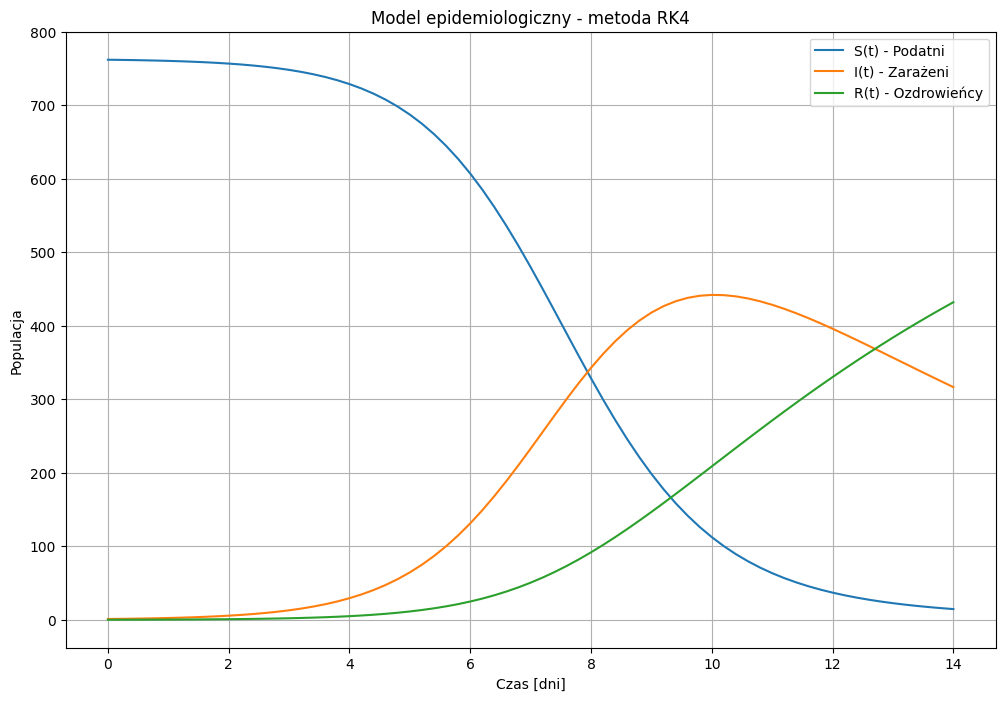

In [9]:
plot_SIR(S_RK4, I_RK4, R_RK4, t, 'metoda RK4')

Wspólny wykres sumy $S(t) + I(t) + R(t)$ dla każdej z metod

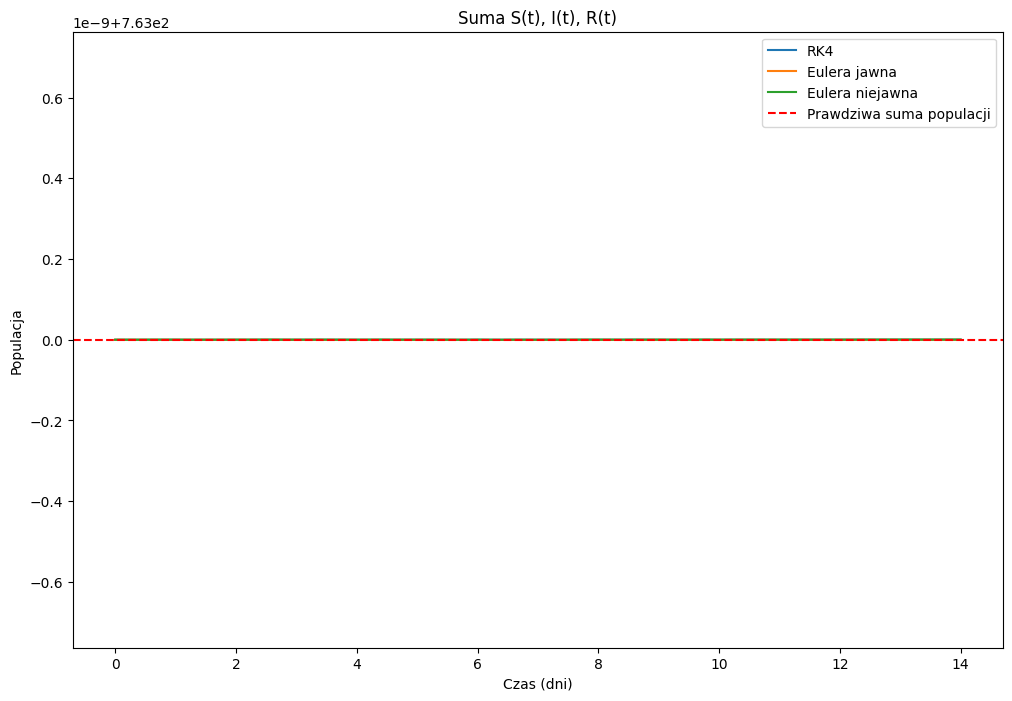

In [10]:
plt.figure(figsize=(12,8))
plt.plot(t, S_RK4 + I_RK4 + R_RK4, label='RK4')
plt.plot(t, S_ee + I_ee + R_ee, label='Eulera jawna')
plt.plot(t, S_ie + I_ie + R_ie, label='Eulera niejawna')
plt.axhline(y=N, color='r', linestyle='--', label='Prawdziwa suma populacji')
plt.xlabel('Czas (dni)')
plt.ylabel('Populacja')
plt.title('Suma S(t), I(t), R(t)')
plt.legend()
plt.show()

```Poszukiwanie wartości współczynników``` $\theta = [\beta, \gamma]$

Wczytanie rzeczywistych danych

In [11]:
t_real = np.arange(0, 15, 1)
I_real = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])

In [12]:
def model(theta, t):
    beta, gamma = theta
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    # Metoda jawna Eulera
    for n in range(1, len(t)):
        S[n] = S[n-1] - h * beta * S[n-1] * I[n-1] / N
        I[n] = I[n-1] + h * beta * S[n-1] * I[n-1] / N - h * gamma * I[n-1]
        R[n] = R[n-1] + h * gamma * I[n-1]
    
    return I

Dla funkcji kosztu: $L(\theta) = \sum_{i=0}^{T} (I_i - \hat{I}_i)^2$

In [13]:
def cost_function(theta):
    I_pred = model(theta, t_real)
    return np.sum((I_real - I_pred)**2)

# Poczatkowe wartosci parametrow
theta_initial = [1.0, 1/7]
result = minimize(cost_function, theta_initial, method='Nelder-Mead')
beta_opt, gamma_opt = result.x

print(f'Optymalne wartości: beta = {beta_opt:.2f}, gamma = {gamma_opt:.2f}')
# Obliczenie wspolczynnika reprodukcji R0
R0 = beta_opt / gamma_opt
print(f'Współczynnik reprodukcji R0 = {R0:.2f}')

Optymalne wartości: beta = 10.73, gamma = 3.02
Współczynnik reprodukcji R0 = 3.56


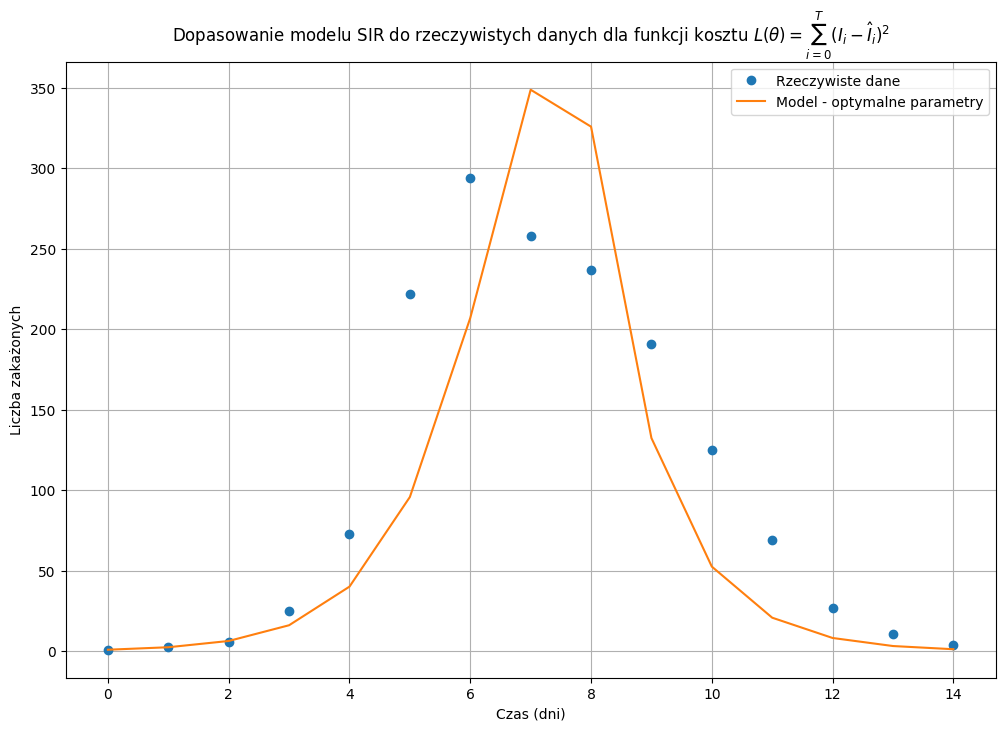

In [14]:
I_opt = model([beta_opt, gamma_opt], t_real)

plt.figure(figsize=(12, 8))
plt.plot(t_real, I_real, 'o', label='Rzeczywiste dane')
plt.plot(t_real, I_opt, '-', label='Model - optymalne parametry')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba zakażonych')
plt.title(r'Dopasowanie modelu SIR do rzeczywistych danych dla funkcji kosztu $L(\theta) = \sum_{i=0}^{T} (I_i - \hat{I}_i)^2$')
plt.legend()
plt.grid(True)
plt.show()

Dla funkcji kosztu: $L(\theta) = - \sum_{i=0}^{T} I_i \ln \hat{I}_i + \sum_{i=0}^{T} \hat{I}_i$

In [15]:
def cost_function_log(theta):
    I_pred = model(theta, t_real)
    term1 = np.sum(I_real * np.log(I_pred))
    term2 = np.sum(I_pred)
    return -(term1 - term2)

# Poczatkowe wartosci parametrow
theta_initial = [1.0, 1/7]
result_log = minimize(cost_function_log, theta_initial, method='Nelder-Mead')
beta_opt_log, gamma_opt_log = result_log.x

print(f'Optymalne wartości (log): beta = {beta_opt_log:.2f}, gamma = {gamma_opt_log:.2f}')

# Obliczenie wspolczynnika reprodukcji R0
R0_log = beta_opt_log / gamma_opt_log
print(f'Współczynnik reprodukcji R0 (log): {R0_log:.2f}')

Optymalne wartości (log): beta = 11.19, gamma = 2.19
Współczynnik reprodukcji R0 (log): 5.10


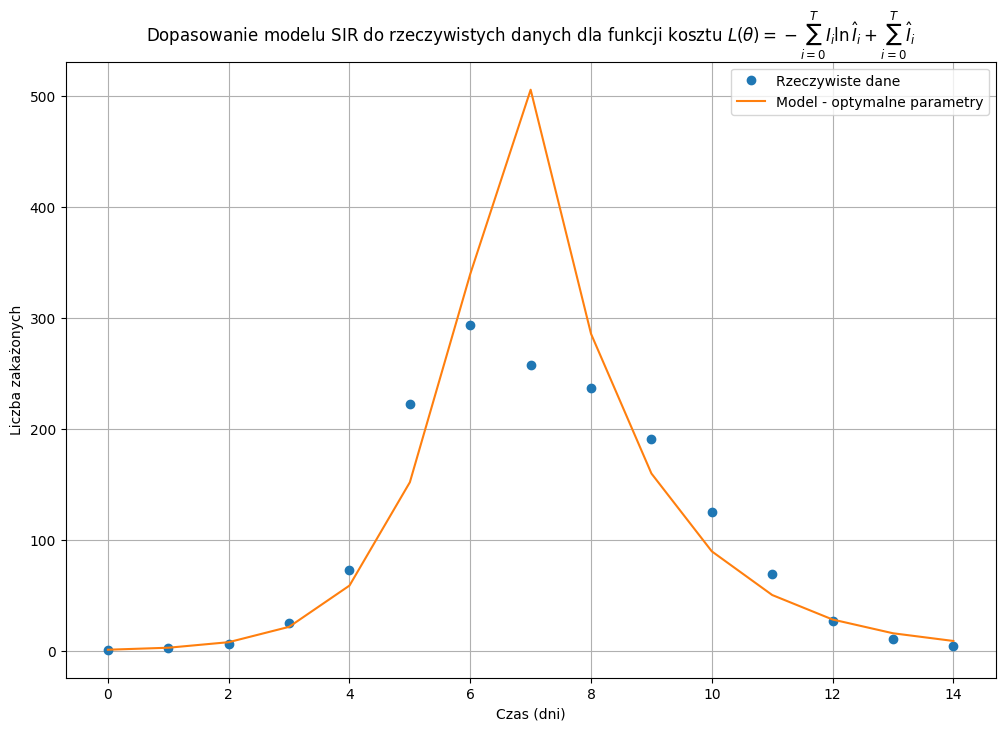

In [16]:
I_opt = model([beta_opt_log, gamma_opt_log], t_real)

plt.figure(figsize=(12, 8))
plt.plot(t_real, I_real, 'o', label='Rzeczywiste dane')
plt.plot(t_real, I_opt, '-', label='Model - optymalne parametry')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba zakażonych')
plt.title(r'Dopasowanie modelu SIR do rzeczywistych danych dla funkcji kosztu $L(\theta) = - \sum_{i=0}^{T} I_i \ln \hat{I}_i + \sum_{i=0}^{T} \hat{I}_i$')
plt.legend()
plt.grid(True)
plt.show()